In [8]:
suppressPackageStartupMessages({
    library(sna)
    library(testthat)
})

# Introduction to networks
This tutorial will introduce some fundamental concepts of graph theory and network analysis. The tutorial is structured in three parts
* Using a toy network
* Exploring empirical networks
* Further metrics for digraphs

Definitions and explanations of network terms are avialble in the online textbook by [Haneman and Riddle (2005)](http://faculty.ucr.edu/~hanneman/nettext/). A caveat is that their textbook does not provide mathematical definitions and also provides instructions for UCINET only. An excellent introduciton to graph theory is provided by [Robin J. Wilson ](https://www.maths.ed.ac.uk/~v1ranick/papers/wilsongraph.pdf) but be mindful that he goes into **a lot** more detail about **a lot less** of what we need in working with graphs. Still, the book is a good reference for basic defnitions in grahp theory (and some puzzles for the real nerds).

The topics here are also covered in the slides for week 9. Note that there are some algebraic formulae in here, this is only used for clarity and to avoid ambiguity - you will not be required to use graph theoretic formulae yourself.

For the purposes of the length of the tutorial, there are some questions that are marked **optional** that I do not consider compulsory. In the coming weeks you might find that some of the optional sections help you understand other topics and you can circle back to these then if you like.


# Adjacency Matrix
Create an empty $n \times n$  **adjacency** matrix $X$ for $n=5$ nodes $$
V =\{1,2,3,4,5 \}
$$

In [3]:
n <- 5
X <- matrix(0,n,n) # create a matrix with n rows and n columns and all values 0

In [4]:
X

0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0


Adjacency matrix: 

Assume that the graph has the edge set $$ E = \{ \{1,2\},\{1,3\}, \{2,3\},\{3,4\}, \{4,5\} \} $$

Recall that we use curly brackets, e.g. $\{1,2\}$, for **unordered pairs**. Set the corresponding tie-variables to 1 (consider whether the network is directed or not) in the adjacency matrix $X$

In [5]:
# YOUR CODE HERE
#stop('No Answer Given!')
#X[1,2] = X[2, 1] = 1
#X[1,3] = X[3, 1] = 1
#X[2,3] = X[3, 2] = 1
#X[3,4] = X[4, 3] = 1
#X[4,5] = X[5, 4] = 1

In [6]:
X

0,1,1,0,0
1,0,1,0,0
1,1,0,1,0
0,0,1,0,1
0,0,0,1,0


Draw the network graph using the 'sna' package

In [6]:
X <- matrix(0,n,n)
X[1,2] = 1
X[1,3] = 1
X[2,3] = 1
X[3,4] = 1
X[4,5] = 1
X
t(X)
X <- X + t(X)
X


0,1,1,0,0
0,0,1,0,0
0,0,0,1,0
0,0,0,0,1
0,0,0,0,0


0,0,0,0,0
1,0,0,0,0
1,1,0,0,0
0,0,1,0,0
0,0,0,1,0


0,1,1,0,0
1,0,1,0,0
1,1,0,1,0
0,0,1,0,1
0,0,0,1,0


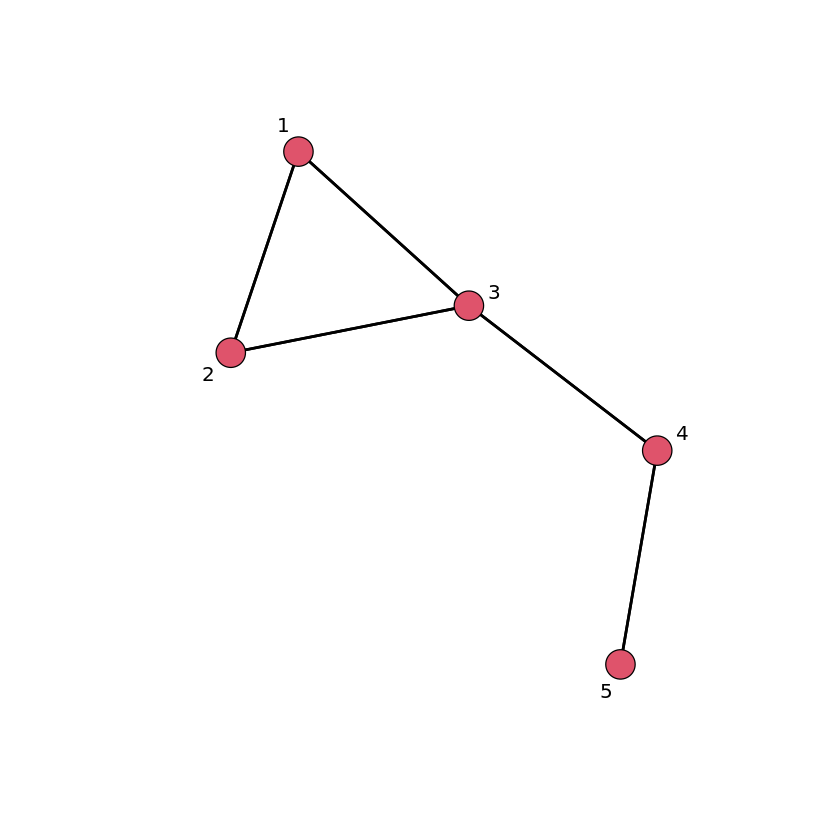

In [9]:
gplot(X, 
      gmode='graph', 
      label = c(1:5))# in the sna package, gmode is 'graph' or 'digraph' depending on whether the network is directed or not

#### Question 1
Looking at the graph, how many edges are there in the network?

YOUR ANSWER HERE

In graph theoretic terms we can denote this as the cardinality $|E|$ of the edge set.

In graph theoretic terms we can denote the degree of node $i \in V$ by $d_i = |N(i)|$, where $N(i)=\{j \in V: \{i,j\} \in E \}$ is the set of neighbours of node $i \in V$. Sometimes you will see the use of $i \thicksim j$ used to denote that $j$ is a neighbour of $i$. The vertical bars mean **cardinality**, i.e. the number of elements in a set. The set $A=\{a,b,c\}$ has cardinality $|A|=3$.

#### Question 2

Looking at the graph, which node has the highest degree and which node has the lowest degree?

YOUR ANSWER HERE

## Degrees and density

#### Question 3

If each node had a tie to every other node, what degree would every node have? Motivate your answer.

YOUR ANSWER HERE

#### Question 4

If all nodes had maximum degree, what would the *total degree* $\sum_{i=1}^n d_i$ be? Answer in terms of $n$.

YOUR ANSWER HERE

#### Question 5

What is the maximum number of edges a graph on 5 nodes could have? Motivate your answer


YOUR ANSWER HERE

Using the tie-variables $x_{ij}$ of the adjacency matrix $X$, we can define the *total degree* as $\sum_{i=1}^n \sum_{j=1}^n x_{ij}$.
Based on your anwers to Questions 1 and 5, use the sum function and n to calculate the density of the network.

In [10]:

my.density <- function(X,n){
    # YOUR CODE HERE
    #stop('No Answer Given!')
    sum(X)/(n*(n-1))
}    

In [11]:
my.density(X, n)
X

[1] 0.5

0,1,1,0,0
1,0,1,0,0
1,1,0,1,0
0,0,1,0,1
0,0,0,1,0


Use your function to calculate the denisty of the network.

#### Question 6
Use the sna function `gden` to check your answer. Did you get the same answer?



In [12]:
gden(X, mode='graph')

[1] 0.5

Calculate the vertex degrees with colSums, tabulate them, and plot the degree distribution

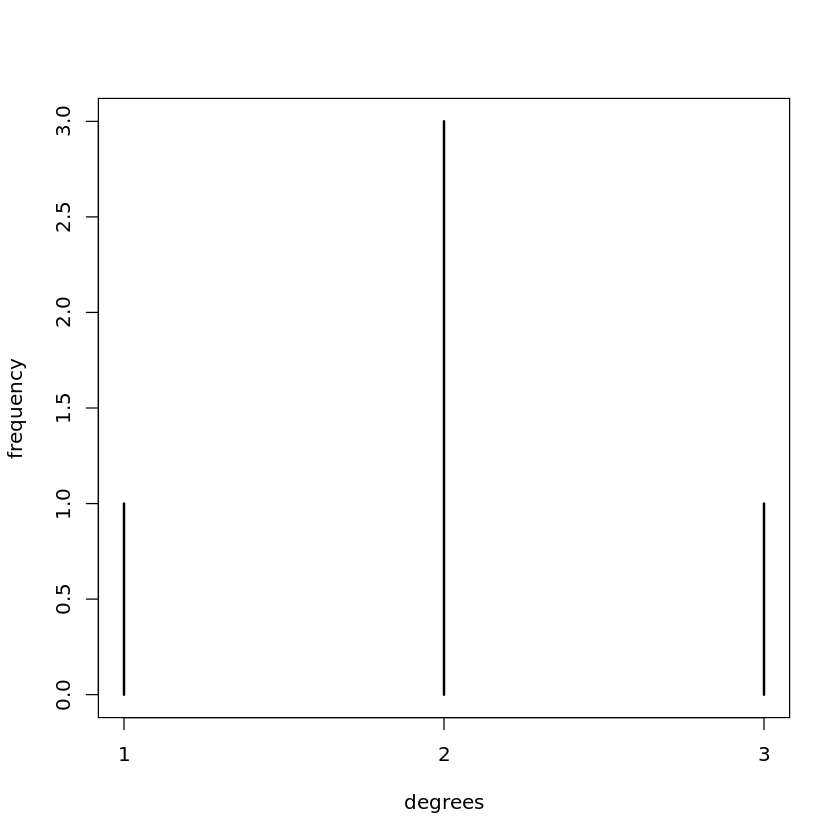

In [13]:
plot ( table( colSums(X) ) ,ylab='frequency',xlab='degrees')

#### Question 7

What is the mode of the degree distribution?

YOUR ANSWER HERE

## Network position

### Degree centrality

NOTE: For the sna functions `degree` and `betweenness`, gmode is used to distinguish between 'graph' and 'digraph'; for the sna functions `cutpoints` and `triad.census`, the argument is called mode (for some reason).

For a network we may ask what node is most *central*. There are many different measures of centrality. The most fundamental is **degree centrality**. This is the (normalised) degree of nodes. In Question 2 you already picked out the most central node, using the degree distribution. You can do this also using the function

In [14]:
degree( X , gmode='graph')

[1] 2 2 3 2 1

Does this agree with the degrees?

You can normalise this relative to the maximum.

### Betweeness centrality
Is the highest degree node always the most central and are all nodes with the same degree equally central? What about the extent to which a node connects other nodes?

Following the lecture slides, we define a *path* from one node to another as a **sequence of edges** connecting one node with another. We can identify this path using its **node sequence**, i.e., the sequence of nodes on the path. 

Here, use the convention that we list a path starting with the lowest index, e.g., `c(1,3,4)` rather than 4,3,1.

Inspecting the graph, provide the geodesic- the shortest path- between 1 and 5.

In [21]:
P <- c(1,3,4,5)
 # YOUR CODE HERE
 #stop('No Answer Given!')

**Betweeness centrality** calculates how many geodesics - shortest paths - every node is on. Looking at the graph, which node should have highest betweeness? Also calculate the betweeness centrality using the function

In [15]:
betweenness( X , gmode ='graph' )

[1] 0 0 4 3 0

#### Question 8
Do you get the same answer and do all nodes with the same degree centrality have the same betweeness centrality? In addition, list all geodesics this node is on


YOUR ANSWER HERE

### Optional: Difference between measures
Construct a network on $n=5$ nodes where the highest degree node is not the (uniquely) highest in betweeness centrality. Construct the adjacency matrix and check the two centralities

[1] 1 3 3 3 2

[1] 0 3 1 1 0

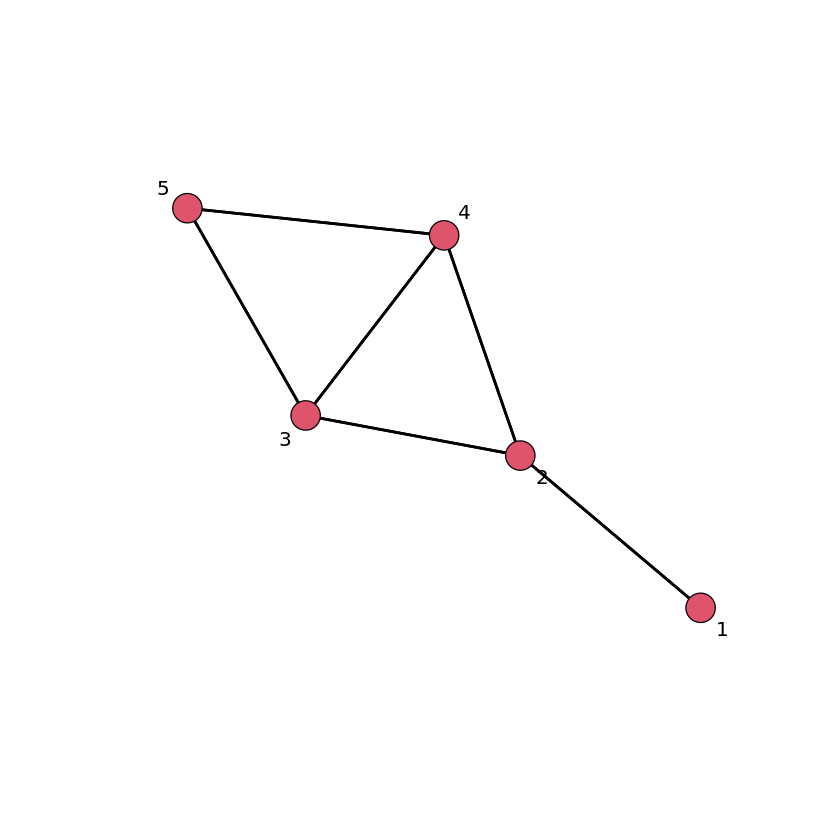

In [16]:
Y <- matrix(0,n,n)
# YOUR CODE HERE - add ties to Y
# YOUR CODE HERE
#stop('No Answer Given!')
Y[1,2] <- 1
Y[2,3] <- 1
Y[3, 4] <-1
Y[4,5] <- 1
Y[2,4] <-1
Y[3, 5] <-1
Y <- Y + t(Y)
gplot( Y , gmode='graph',label=c(1:5) )
degree( Y , gmode='graph')
betweenness( Y , gmode ='graph' )

Check other centrality measures in [Haneman and Riddle (2005)](http://faculty.ucr.edu/~hanneman/nettext/). An interesting question to find out is

> Is Google's pagerank algorithm and Eigenvector centrality the same?

NOTE: Leo Katz, who introduced the precursor to Eigenvector centrality (in Psychometrika, in 1953) is a different Katz to the famous Elihu Katz, who introduced network diffusion (with Coleman and Menzel).

### Brokers
Looking at the orignal graph, with adjacency matrix $X$, are there any cutpoints? Check by returning a list of any cutpoints

In [18]:
cutpoints( X , mode = "graph")

[1] 3 4

#### Question 9

What happens to the graph when either one of the indicated cutpoints are removed?


YOUR ANSWER HERE

### Triad closure

A triad is a triple $\{ i,j,k \} \subset V$ of nodes and its **induced subgraph**, i.e. all edges $\{ a,b \}$ such that $a,b \in \{i,j,k \}$. A triad is *closed* if it forms a *triangle*, that is, if the induced subgraph is a complete graph. If  $V_{ijk}=\{ i,j,k \}$ is a closed triad, then $x_{ij}x_{ik}x_{jk}=1$ and $\sum_{ab \in{  V_{ijk} \choose 2}}x_{ab}=3$. For example

0,1,1,0,0
1,0,1,0,0
1,1,0,1,0
0,0,1,0,1
0,0,0,1,0


0,1,1
1,0,1
1,1,0


[1] 3

[1] 1

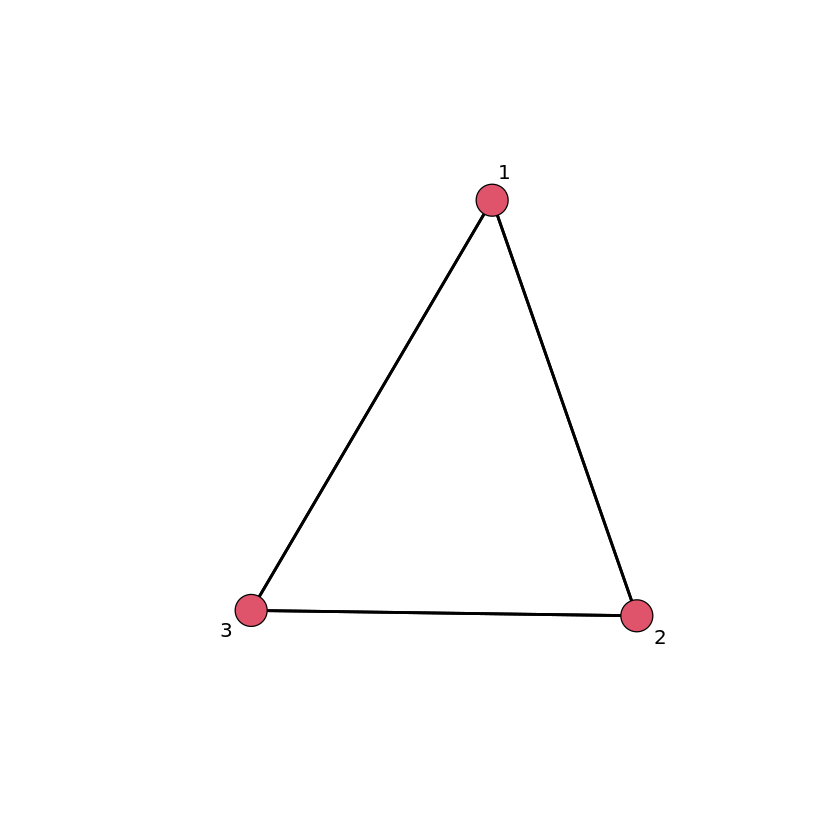

In [25]:
X
node.set <- c(1,2,3)
X[node.set, node.set]
gplot(X[node.set,node.set],gmode='graph',label=node.set)
sum(X[node.set,node.set])/2
X[1,2]*X[1,3]*X[2,3]

In [27]:
X
node.set
X[node.set,node.set]

0,1,1,0,0
1,0,1,0,0
1,1,0,1,0
0,0,1,0,1
0,0,0,1,0


[1] 1 2 3

0,1,0
1,0,0
0,0,0


is a closed triad and 

[1] 2

[1] 0

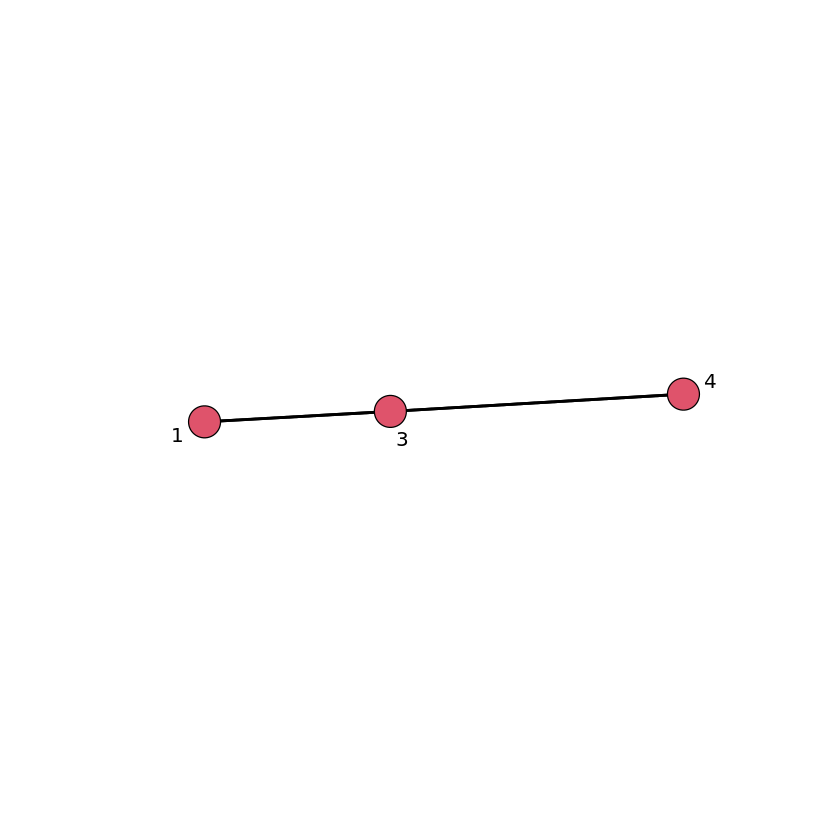

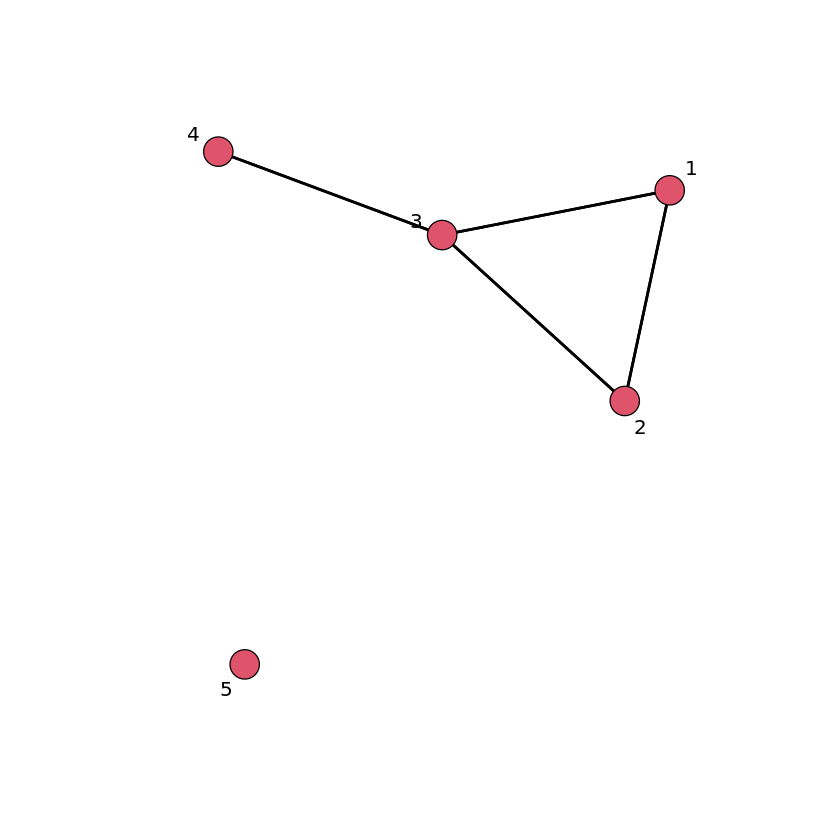

In [28]:
node.set <- c(1,3,4)
gplot(X[node.set,node.set],gmode='graph',label=node.set)
sum(X[node.set,node.set])/2
X[1,2]*X[1,5]*X[2,5]
#gplot(X,gmode='graph',label=)
#X[4 ,5] <- 0
#X[5, 4] <- 0
gplot(X, 
      gmode='graph', 
      label = c(1:5))# in the sna package, gmode is 'graph' or 'digraph' depending on w

is not, it is an *open triad*.

We can tally how many occurences there are of each type of triad. Calculate the triad census: also, how many triads in total? express in terms of n

0,1,1,0,0
1,0,1,0,0
1,1,0,1,0
0,0,1,0,0
0,0,0,0,0


0,1,2,3
2,5,2,1


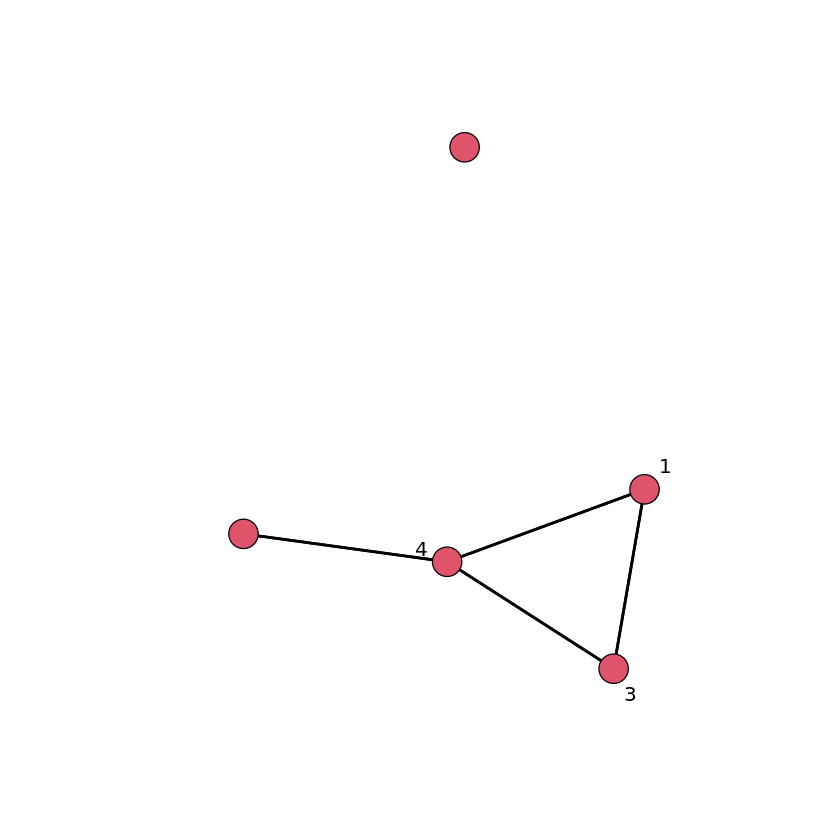

In [29]:
X
gplot(X,gmode='graph',label=node.set)
triad.census( X , mode = "graph")

#### Question 10

What does the label numbers correspond to?

YOUR ANSWER HERE

#### Optional: Question 11 

How many triads are there in the graph - answer in terms of $n$?

YOUR ANSWER HERE

Check your calculation on $X$ by comparing the sum of the triad cencus with your formula

In [ ]:
sum(triad.census( X , mode = "graph"))
# YOUR CODE HERE - use n and treat R like a caluclator
# YOUR CODE HERE
stop('No Answer Given!')


### Clustering coefficient

The ratio of the number of closed triads to the number of open triads is of particular interest. The clustering coefficient is defined as 
$$
\frac{3T_3}{3T_3+T_2},
$$
where $T_3$ is the number of closed triads and $T_2$ is the number of open triads.


#### Question 12 Optional?

Calculate the clustering coefficient manually and compare it to the answer from gtrans

In [ ]:
gtrans(X)
# YOUR CODE HERE
stop('No Answer Given!')

What is the propotion of closed triangles to open triads?


### Optional: Cliques

A closed triad is a clique of size 3, or a 3-clique. List the cliques in the graph using clique.census

In [ ]:
cc <- clique.census( X , mode = "graph")
cc$cliques

#### Optional Question 13
This clique census only lists maximal cliques - why? What two cliques are node 3 a member of?

YOUR ANSWER HERE

## Global measures

### Centralisation

To summarise how dispersed the degrees are, centralization is defined as
$$
C(X) = \sum_{i=1}^n \mid  d_{max}-d_i \mid
$$
where
$$
d_{max}=\max_{i \in V}(d_i)
$$
is the maximum degree. Consequently, this measures the sum of absolute deviations from the maximum degree. This can also be normalised to act more like a variance or standard deviation (see help function). 

#### Optional: Question 14

Calculate the centralisation of $X$ manually and compare to the `centralization` function

In [ ]:
centralization(X,degree,normalize=FALSE, mode='graph')
# YOUR CODE HERE
stop('No Answer Given!')


### Distance

For Question 8 you calculated how many geodesic paths a node was on. For the entire graph, we can also calculate the geodesic distribution of all pairs of dyads.


In [ ]:
gd<-geodist(X)
gd$gdist

The **diameter** of a graph is *greatest length of the shortest path* between any two vertices.

#### Question 15

What is the diameter of the toy graph?

YOUR ANSWER HERE

### Optional: Calculating distance

Using linear algegra, if $x_{ij}$ in $X$ tell you if $i$ and $j$ are directly connected, element $(XX)_{i,j}$ of the matrix product $XX$, tells you how many paths $i \rightarrow k \rightarrow j$ there are

In [ ]:
X %*% X

Element $(XXX)_{i,j}$ of the matrix product $XXX$, tells you how many paths $i \rightarrow k \rightarrow h \rightarrow j$ there are

In [ ]:
X %*% X %*% X

#### Question 16 Optional
Comparing the geodesic distances with $XX$, we see that the distance between 2 and 5 is 3 and indeed there are zero paths of length 2 in $XX$ and 1 path of length three in $XXX$ but why is $(XXX)_{3,5}$ zero?

YOUR ANSWER HERE

NB: A path is the special case of a walk, as all vertices are distinct in a path

# Empirical networks
Throughout this module we will be applying network analysis to a suit of real life networks. In this section we will pick two networks and analysing them using some of the metrics above.

## Load data

### Red Highland tribes
A classic training data set, originally collected by Read (1954), is that of $n=16$ tribes of the Gahuku–Gama alliance structure of the Eastern Central Highlands of New Guinea and their positive and negative ties  (Hage and Harary 1983).

In [ ]:
temp <- tempfile()
download.file("https://raw.githubusercontent.com/johankoskinen/BayesERGM/main/data/RedHighlandTribes.txt",temp)
tribes.all <- read.table(temp)# this two adjacency matrices stacked ontop of each other in a text file
unlink(temp)
tribesPos <- tribes.all[1:16,]# the first 16 lines are the positive ties

### Bank wiring room
Coming out of an extensive study by Mayo, Roethlisberger, and Dickson (1939), this dataset maps the ineractions among $n=14$ emplyoyes The interaction categories include: RDGAM, participation in horseplay; RDCON, participation in arguments about open windows; RDPOS, friendship; RDNEG, antagonistic (negative) behavior; RDHLP, helping others with work; and RDJOB, the number of times workers traded job assignments.


In [ ]:
temp <- tempfile()
download.file("https://raw.githubusercontent.com/johankoskinen/BayesERGM/main/data/bankwiring.txt",temp)
wiring <- read.table(temp)# this four adjacency matrices stacked ontop of each other in a text file
unlink(temp)
RDPOS <- wiring[(2*14+1):(3*14),]# RDPOS symmetric, binary,  friendship

Plot the networks

In [ ]:
par(mfrow=c(1,2))
# YOUR CODE HERE
stop('No Answer Given!')

#### Question 17

Calculate the density of the networks.

In [ ]:
# YOUR CODE HERE
stop('No Answer Given!')

Which network is the more dense?

YOUR ANSWER HERE

Plot the degree distribution of the Red highland tribes and the Bank wiring room.

In [ ]:
# YOUR CODE HERE
stop('No Answer Given!')

Can you say, qualitatively, which network has the most evenly distributed degree distribution?

Calculate the centralization index **but** normalise the measure so that you can compare the relative centralisation of the networks

In [ ]:
# YOUR CODE HERE
stop('No Answer Given!')

#### Question 18

Which network is more centralised and does this reflect the shape of the degree distribution?

YOUR ANSWER HERE

Look at the network graphs, can you tell which network is more *clustered*? Calculate the triad census

In [ ]:
# YOUR CODE HERE
stop('No Answer Given!')

And calculate the clustering coefficient using `gtrans`

In [ ]:
# YOUR CODE HERE
stop('No Answer Given!')

#### Question 19

What are your conclusions in comparing the networks? Can you think of reasons why one might appear more clustered than the other?

YOUR ANSWER HERE

## Optional: Compare with a bigger network
Load Zachary karate:
### Zachary's karate club
A network of $n=34$ members of a karate club (made famous as the testbed for community detection and blockmodelling algorithms) from the work of  Zachary (1977)

In [ ]:
temp <- tempfile()
download.file("https://raw.githubusercontent.com/johankoskinen/BayesERGM/main/data/zachary.txt",temp)
Zachary <-  read.table(temp)# this two adjacency matrices stacked on top of each other in a text file
unlink(temp)
ZacharyBinary <- Zachary[1:34,]# symmetric, binary, positive

This karate club had two factions with two leaders. Can you see this from the graph?

In [ ]:
gplot(ZacharyBinary,
      gmode='graph',
      label=c(1:34),
      label.pos = 5 ,# label.pos puts = 5 labels on top of nodes
      label.cex = .5, # make labels smaller
      vertex.col = NA)# do not fill vertices

#### Optional: Question 20

The question now is - which network is the more dense? Calculate the density.

In [ ]:
# YOUR CODE HERE
stop('No Answer Given!')

How do we interpret these numbers and do they may sense?

It might help interpretation if instead of density focus on *average degree*, i.e. the average number of ties a node has. The average degree is defined simply as
$$
\frac{\sum_{i=1}^n d_{i}}{n}
$$

Caluclate average degree:

In [ ]:
# YOUR CODE HERE
stop('No Answer Given!')

In which network do the nodes have more ties, and is it denser?

YOUR ANSWER HERE

# Directed networks
We will go through directed networks more in future lectures. Our metrics are defined more or less in the same way. The two additional concepts that are cucial to directed networks are related to the types of *degree distributions*, *dyads* and *triads*.

### Kapferer's tailors
Bruce Kapferer (1972) studied a group of tailors in Zambia and collected a number of networks for the $n=39$ individuals.


In [ ]:
temp <- tempfile()
download.file("https://raw.githubusercontent.com/johankoskinen/BayesERGM/main/data/kapferer.txt",temp)
kapf  <-  read.table(temp)# four adjacency matrices stacked on top of each other
unlink(temp)
# "instrumental" (work- and assistance-related) interactions
KAPFTT1 <- kapf[(2*39+1):(3*39),]# KAPFTI1 non-symmetric, binary: time 1

### Degree distributions
Since nodes can *send* and *receive* ties, there are two types of degrees: indegree and outdegree


In [ ]:
par( mfrow = c(1,3))
# outdegree:
plot( table( degree( KAPFTT1 , cmode = 'outdegree') ),type='b',main='outdegree',ylab='frequency')
# indegree:
plot( table( degree( KAPFTT1 , cmode = 'indegree') ),type='b',main='indegree' ,ylab='frequency')
# in and out
plot( degree( KAPFTT1 , cmode = 'outdegree'),
      degree( KAPFTT1 , cmode = 'indegree') ,
      main='degree correlation',xlab='outdegree',ylab='indegree' )

#### Optional: Question 21

Provide a potential interpretation of the graphs

YOUR ANSWER HERE

### Dyad census
Since each tie can be either assymetric or reciprocated, we can distinguish between pairs of nodes, *dyads*, that are mutual, assymetric, or null. A tally of dyads is:

In [ ]:
dyad.census( KAPFTT1 )

#### Optional: Question 22

Does the dyad census change any of our interpretations of the correlation between in and outdegree?

YOUR ANSWER HERE

### Triad census

For undirected networks we can only have three types of triads. For directed networks there are 16 possibilities.

![The 16 MAN triads for directed networks .](https://raw.githubusercontent.com/johankoskinen/BayesERGM/main/data/triadcensus.png)

Each triad is labeled by its dyad census - this is called the MAN labeling scheme.

#### Optional: Question 23
What does the label for triad 15 - 210 stand for and what does the D, U, and C stand for in 021?

YOUR ANSWER HERE

#### Optional: Question 24
Calculate the triad census for Kafperer's tailors.

In [ ]:
triad.census( KAPFTT1)

Assume that the ties are related to 'asking for help' or 'asking for assistance', how would you explain 030C?

YOUR ANSWER HERE

# Summary

This tutorial has largely been agnostic to what the nodes and ties are and why the different measures might be important. In the sequel we will investigate such things as

* Why may some people be more central than others?
* Would we expect to see more closed than open triads and if so why?
* Is information and disease spread in networks sensitive to cutpoints?
